Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

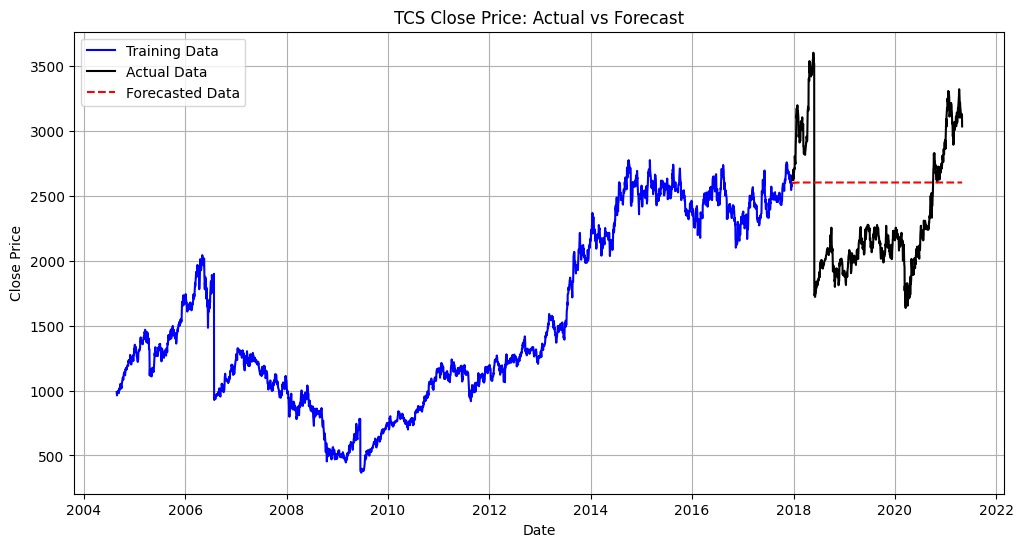

TCS ARIMA Model Evaluation
MAE: 498.96
MSE: 289148.67
RMSE: 537.73


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

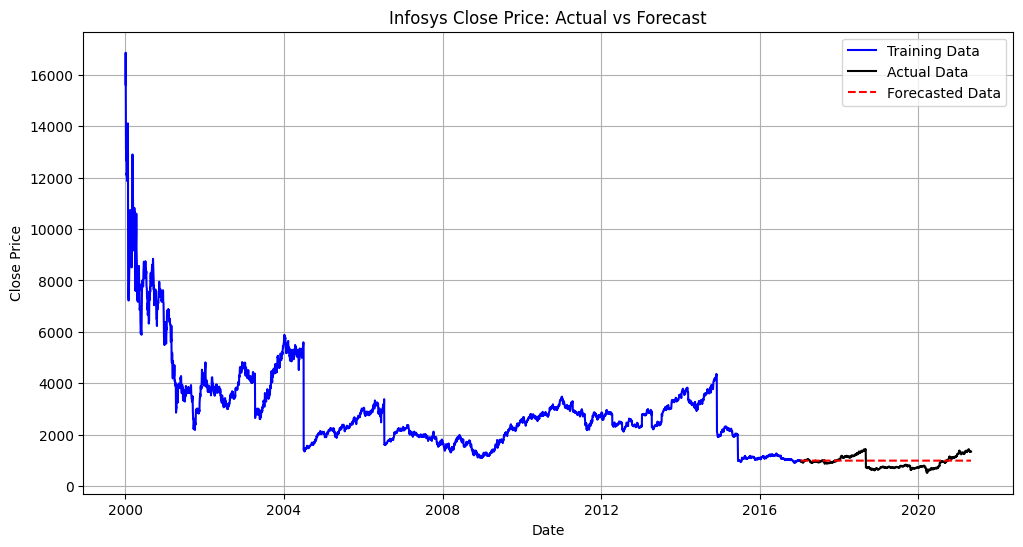

Infosys ARIMA Model Evaluation
MAE: 198.63
MSE: 53572.88
RMSE: 231.46


In [23]:
# ARIMA Model Implementation

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load data
df_tcs = pd.read_csv('/content/drive/MyDrive/TCS.csv', parse_dates=['Date'], index_col='Date')
df_infosys = pd.read_csv('/content/drive/MyDrive/INFY.csv', parse_dates=['Date'], index_col='Date')

# Drop any rows with missing 'Close' values
df_tcs = df_tcs.dropna(subset=['Close'])
df_infosys = df_infosys.dropna(subset=['Close'])

#Train-Test Split
train_size_tcs = int(len(df_tcs) * 0.8)
train_size_infosys = int(len(df_infosys) * 0.8)

train_tcs = df_tcs.iloc[:train_size_tcs]
test_tcs = df_tcs.iloc[train_size_tcs:]

train_infosys = df_infosys.iloc[:train_size_infosys]
test_infosys = df_infosys.iloc[train_size_infosys:]

# ARIMA Model for TCS
model_tcs = ARIMA(train_tcs['Close'], order=(2, 1, 2))
tcs_model_fit = model_tcs.fit()

forecast_tcs_series = tcs_model_fit.forecast(steps=len(test_tcs))
forecast_tcs_series.index = test_tcs.index

plt.figure(figsize=(12,6))
plt.plot(train_tcs['Close'], label='Training Data', color='blue')
plt.plot(test_tcs['Close'], label='Actual Data', color='black')
plt.plot(forecast_tcs_series, label='Forecasted Data', color='red', linestyle='--')
plt.title("TCS Close Price: Actual vs Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

# Evaluation Metrics for TCS
aligned_tcs = pd.concat([test_tcs['Close'], forecast_tcs_series], axis=1).dropna()
mae_tcs = mean_absolute_error(aligned_tcs.iloc[:, 0], aligned_tcs.iloc[:, 1])
mse_tcs = mean_squared_error(aligned_tcs.iloc[:, 0], aligned_tcs.iloc[:, 1])
rmse_tcs = np.sqrt(mse_tcs)

print("TCS ARIMA Model Evaluation")
print(f"MAE: {mae_tcs:.2f}")
print(f"MSE: {mse_tcs:.2f}")
print(f"RMSE: {rmse_tcs:.2f}")

# ARIMA Model for Infosys
model_infosys = ARIMA(train_infosys['Close'], order=(1, 1, 2))
infosys_model_fit = model_infosys.fit()

forecast_infosys_series = infosys_model_fit.forecast(steps=len(test_infosys))
forecast_infosys_series.index = test_infosys.index

plt.figure(figsize=(12,6))
plt.plot(train_infosys['Close'], label='Training Data', color='blue')
plt.plot(test_infosys['Close'], label='Actual Data', color='black')
plt.plot(forecast_infosys_series, label='Forecasted Data', color='red', linestyle='--')
plt.title("Infosys Close Price: Actual vs Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

# Evaluation Metrics for Infosys
aligned_infosys = pd.concat([test_infosys['Close'], forecast_infosys_series], axis=1).dropna()
mae_infosys = mean_absolute_error(aligned_infosys.iloc[:, 0], aligned_infosys.iloc[:, 1])
mse_infosys = mean_squared_error(aligned_infosys.iloc[:, 0], aligned_infosys.iloc[:, 1])
rmse_infosys = np.sqrt(mse_infosys)

print("Infosys ARIMA Model Evaluation")
print(f"MAE: {mae_infosys:.2f}")
print(f"MSE: {mse_infosys:.2f}")
print(f"RMSE: {rmse_infosys:.2f}")
